In [1]:
%matplotlib inline

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import copy

In [3]:
data_file = "45.81N-5.77E-TAVG-Trend.txt"

In [4]:
# initialize lists
year = []
month = []
anomaly = []

In [5]:
# import data from txt file
with open(data_file, 'r', encoding = 'latin1') as f:
    reader = csv.reader(f)
    for line in reader:
        lin = line[0].split()
        if len(lin) == 12 and lin[0] != "%": # skip non-data lines
            year.append(float(lin[0]))
            month.append(float(lin[1]))
            anomaly.append(float(lin[2]))

In [6]:
# convert to numpy array
year = np.array(year)
month = np.array(month)
anomaly = np.array(anomaly)

In [100]:
date = year + (month-0.5)/12.0 # convert date to decimal year
print(date)

[1743.20833333 1743.29166667 1743.375      ... 2020.79166667 2020.875
 2020.95833333]


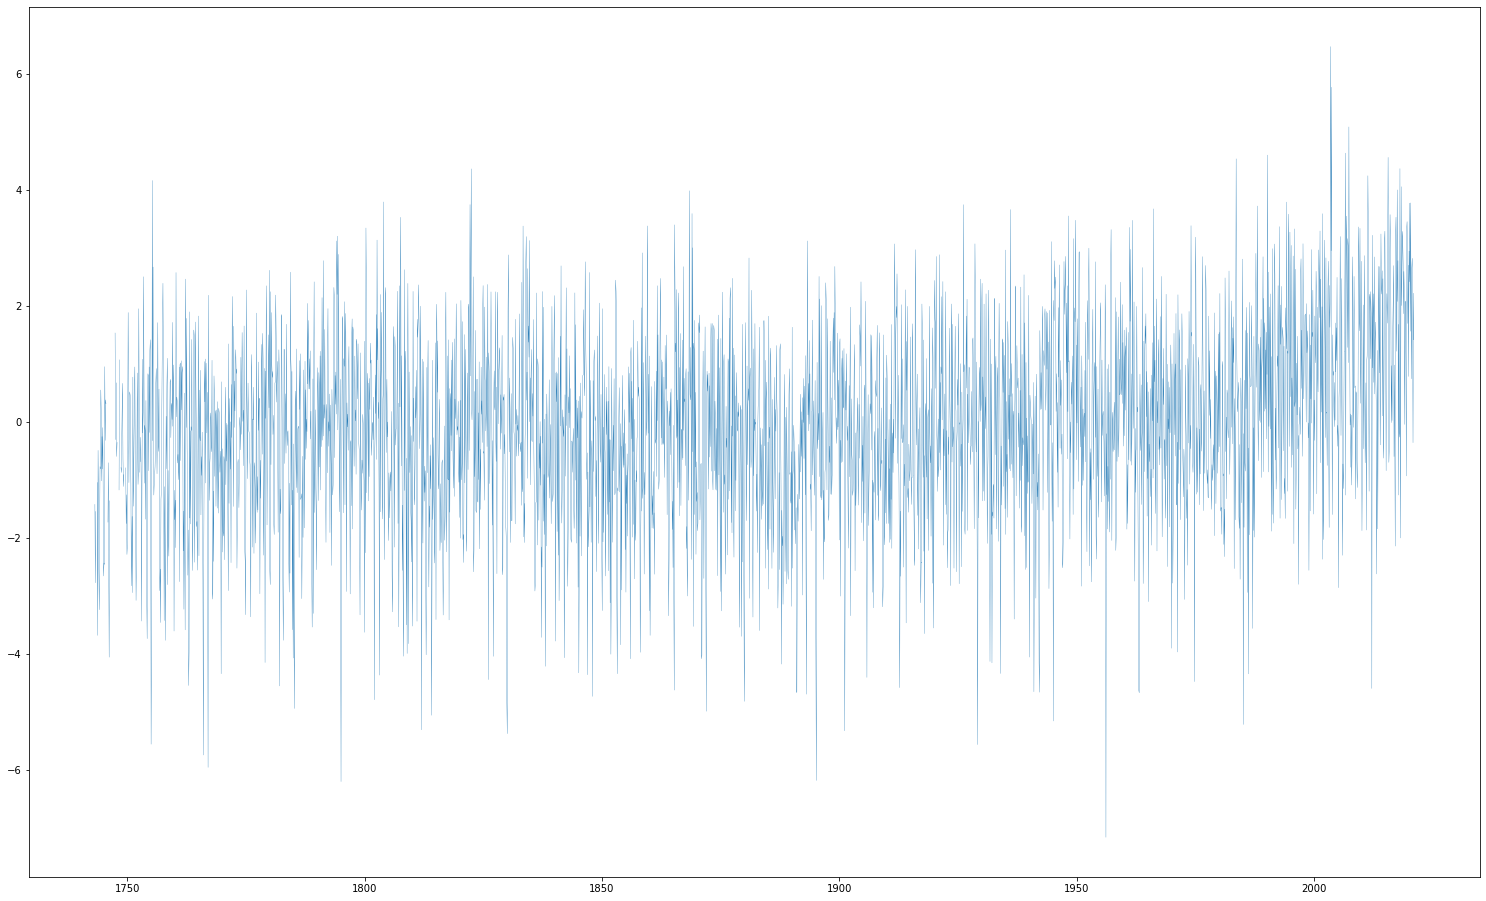

In [16]:
plt.figure(figsize=(26,16))
plt.plot(date,anomaly,linewidth=0.3)
plt.show()

### Crop the time series for which most of the temperatures are available :

In [163]:
print (len(anomaly), len(date)) # the initial length of anomaly and date array

3334 3334


In [155]:
np.isnan(anomaly).sum() #total number of missing data in anomaly (NaN)

28

In [156]:
np.concatenate(np.argwhere(np.isnan(anomaly))) #All the indexes in the anomaly that have NaN

array([  3,   5,  29,  31,  32,  38,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  50,  53,  57,  58,  59,  60,  63,  64,  65,  74,  76,
        77, 114])

In [159]:
indexes2remove = np.arange(0, 78) #we remove the first 78 lines of our datas because of the missing data 
anomaly2 = np.delete(anomaly, indexes2remove)
anomaly2 = np.delete(anomaly2, 36) #36 = 114 - 77 + 1, it's the 36th position where there is a NaN after the beginning of the modified list
np.isnan(anomaly2).sum() # We remove all the NaN missing data in our anomaly array

0

In [162]:
#We have to do the same operation the date array :
date2 = np.delete(date, indexes2remove)
date2 = np.delete(date2, 36)

In [165]:
print (len(anomaly2), len(date2)) # same length

3255 3255


### Interpolation of the datas :

In [9]:
from scipy.interpolate import interp1d

In [206]:
x = np.linspace(1749.7, 2021, 3255, endpoint=True)
y = copy.deepcopy(anomaly2)
f = interp1d(x, y, kind="linear")

In [239]:
xnew = np.linspace(1749.7, 2021, num= int(1e+6))
len(f(xnew))

1000000

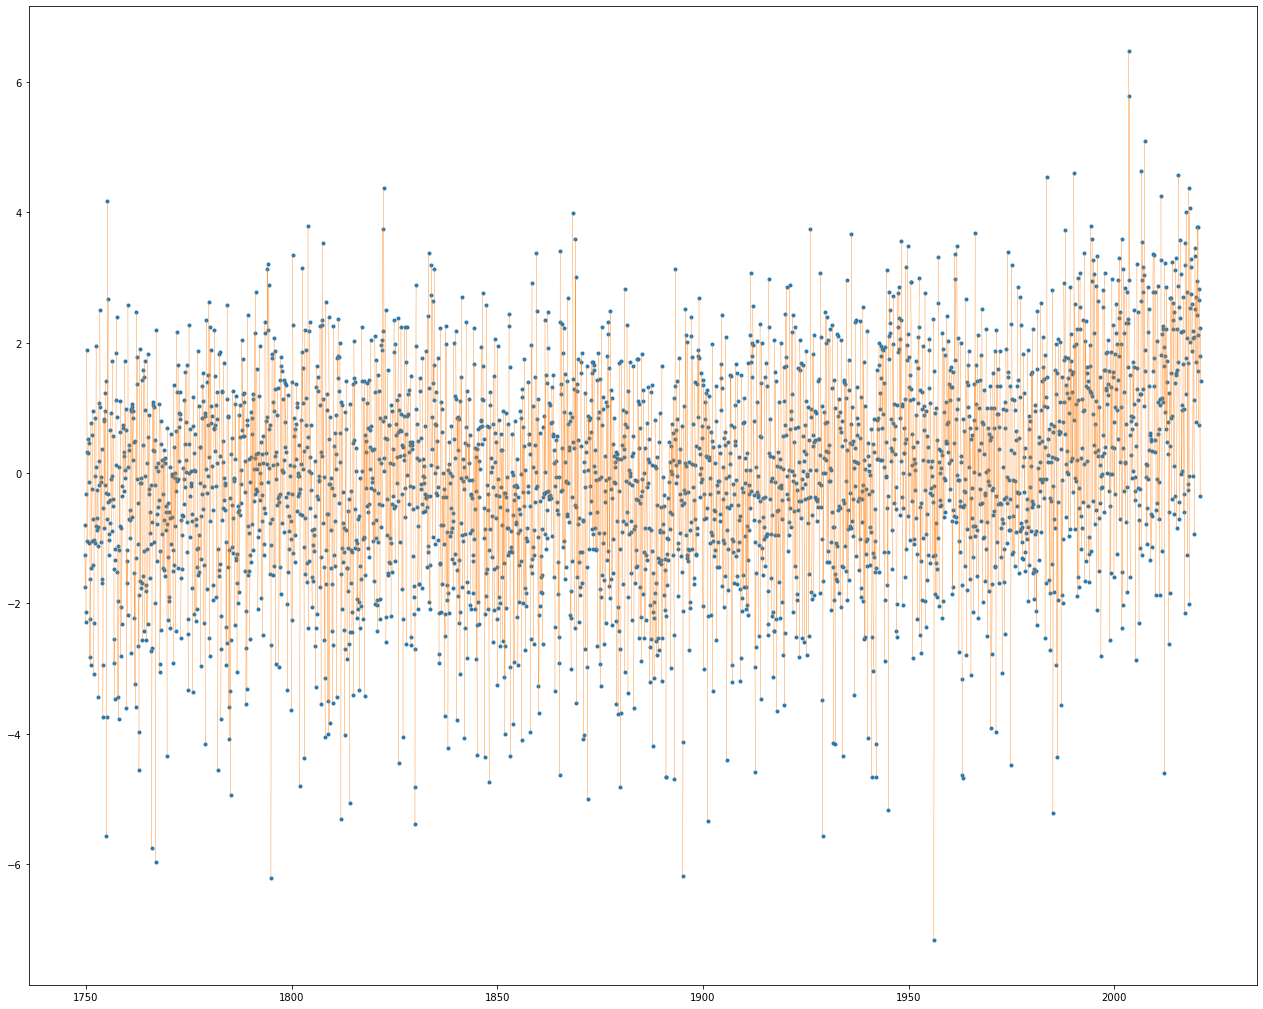

In [240]:
plt.figure(figsize=(22,18))
plt.plot(x, y, '.', xnew, f(xnew), '-', linewidth = 0.2)
plt.show()